<h1>CHICAGO CRIMES ANALIZATION: PARTIAL CSV</h1>
<HR>
<H2>Analyst: John Allen H. Bonggay</H2>

<H2>I. IMPORTING AND VISUALIZING</H2>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
crimes = pd.read_csv("Chicago_Crimes.csv")
crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


<h2>II. IMPORTING DATES</h2>

In [5]:
date = crimes['Date'] = pd.to_datetime(crimes['Date'], dayfirst = True, errors = 'coerce')

In [24]:
crimes['Year'] = crimes['Date'].dt.year
crimes['Month'] = crimes['Date'].dt.month
crimes['Month_Name'] = crimes['Date'].dt.month_name()
crimes['Day'] = crimes['Date'].dt.day
crimes['Week'] = crimes['Date'].dt.isocalendar().week
crimes['Day_Name'] = crimes['Date'].dt.day_name()
crimes['Hour'] = crimes['Date'].dt.hour

hour_labels = {
    0: "12 AM", 1: "1 AM", 2: "2 AM", 3: "3 AM", 4: "4 AM", 5: "5 AM",
    6: "6 AM", 7: "7 AM", 8: "8 AM", 9: "9 AM", 10: "10 AM", 11: "11 AM",
    12: "12 PM", 13: "1 PM", 14: "2 PM", 15: "3 PM", 16: "4 PM", 17: "5 PM",
    18: "6 PM", 19: "7 PM", 20: "8 PM", 21: "9 PM", 22: "10 PM", 23: "11 PM"
}
crimes['Hour_Label'] = crimes['Hour'].map(hour_labels)

crimes[['Date', 'Year', 'Month', 'Month_Name', 'Day', 'Week', 'Day_Name', 'Hour', 'Hour_Label']].head()

,Date,Year,Month,Month_Name,Day,Week,Day_Name,Hour,Hour_Label
0,2024-04-14,2024,4,April,14,15,Sunday,0,12 AM
1,2024-04-14,2024,4,April,14,15,Sunday,0,12 AM
2,2024-04-14,2024,4,April,14,15,Sunday,0,12 AM
3,2024-04-14,2024,4,April,14,15,Sunday,0,12 AM
4,2024-04-14,2024,4,April,14,15,Sunday,0,12 AM


<H2>III. FILLING MISSING VALUES</H2>

In [16]:
mode_loc = crimes['Location Description'].mode()[0]
crimes['Location Description'].fillna(mode_loc, inplace = True)

mode_x = crimes['X Coordinate'].mode()[0]
crimes['X Coordinate'].fillna(mode_x, inplace = True)

mode_y = crimes['Y Coordinate'].mode()[0]
crimes['Y Coordinate'].fillna(mode_y, inplace = True)

mode_lat = crimes['Latitude'].mode()[0]
crimes['Latitude'].fillna(mode_lat, inplace = True)

mode_long = crimes['Longitude'].mode()[0]
crimes['Longitude'].fillna(mode_long, inplace = True)

mode_ation = crimes['Location'].mode()[0]
crimes['Location'].fillna(mode_ation, inplace = True)

In [18]:
crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          3
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
DayofWeek               0
dtype: int64

<h2> IV. CHANGING DATA TYPES</h2>

In [21]:
crimes["Case Number"] = crimes["Case Number"].astype('category')
crimes["Block"] = crimes["Block"].astype('category')
crimes["IUCR"] = crimes["IUCR"].astype('category')
crimes["Primary Type"] = crimes["Primary Type"].astype('category')
crimes["Description"] = crimes["Description"].astype('category')
crimes["Location Description"] = crimes["Location Description"].astype('category')
crimes["FBI Code"] = crimes["FBI Code"].astype('category')
crimes["Updated On"] = crimes["Updated On"].astype('category')
crimes["Location"] = crimes["Location"].astype('category')

In [22]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   ID                    249123 non-null  int64         
 1   Case Number           249123 non-null  category      
 2   Date                  249123 non-null  datetime64[ns]
 3   Block                 249123 non-null  category      
 4   IUCR                  249123 non-null  category      
 5   Primary Type          249123 non-null  category      
 6   Description           249123 non-null  category      
 7   Location Description  249123 non-null  category      
 8   Arrest                249123 non-null  bool          
 9   Domestic              249123 non-null  bool          
 10  Beat                  249123 non-null  int64         
 11  District              249123 non-null  int64         
 12  Ward                  249123 non-null  int64         
 13 

<H1>V.</H1>
<h1>1. CRIME ANALIZATION IN CHICAGO, AMERICA</h1>

<H2>1. Crime Type Analization:</H2>

In [23]:
crimes['Primary Type'].value_counts().sum()

np.int64(249123)

In [4]:
crimes['Primary Type'].value_counts()

Primary Type
THEFT                                59201
BATTERY                              44579
CRIMINAL DAMAGE                      27094
ASSAULT                              22615
MOTOR VEHICLE THEFT                  19604
OTHER OFFENSE                        16781
DECEPTIVE PRACTICE                   14991
BURGLARY                              8443
ROBBERY                               8200
WEAPONS VIOLATION                     7164
NARCOTICS                             6627
CRIMINAL TRESPASS                     5045
OFFENSE INVOLVING CHILDREN            1597
CRIMINAL SEXUAL ASSAULT               1573
SEX OFFENSE                           1210
PUBLIC PEACE VIOLATION                1006
INTERFERENCE WITH PUBLIC OFFICER       771
HOMICIDE                               553
STALKING                               520
ARSON                                  452
PROSTITUTION                           287
CONCEALED CARRY LICENSE VIOLATION      249
LIQUOR LAW VIOLATION                   19

<h3>Insight 1.</h3>
<P>The crime committed the most are theft, followed by Battery, and the least recorded crimes is Non-Criminal.</P>

<h3>Insight 2.</h3>
<P>In the Top 10 Highest Committed Crimes, Property Crimes are the most prominent including Theft, Motor Vehicle Theft, Deceptive Practice,Arson, and  Burglary, which means Chicago suffers and prone to a lot of this crimes.</P>

<h3>Insight 3..</h3>
<P>Sexual Offences are also common in Chicago having over 2738 crimes listed in the database in a span of one year(2024-2025).</P>

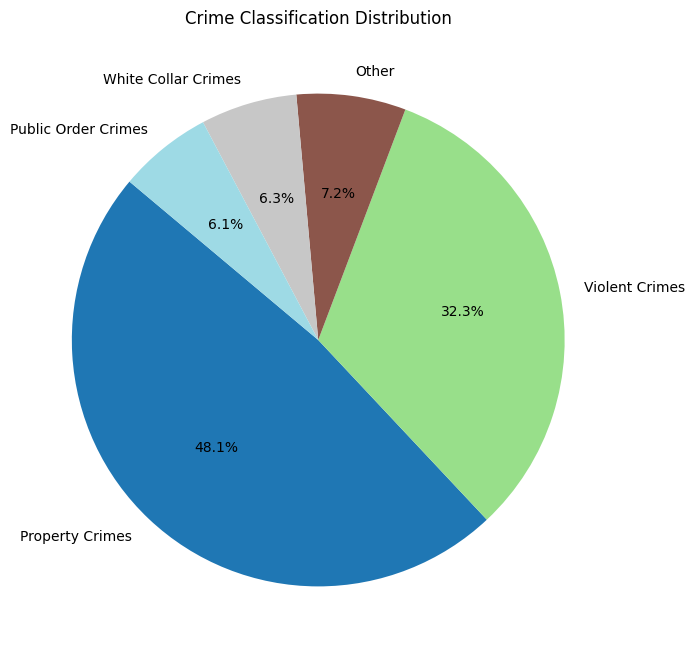

Crime Category
Property Crimes        119839
Violent Crimes          80351
Other                   17870
White Collar Crimes     15762
Public Order Crimes     15301
Name: count, dtype: int64

In [26]:


# Define crime classifications mapping
crime_classification = {
    # Violent crimes
    "HOMICIDE": "Violent Crimes",
    "ASSAULT": "Violent Crimes",
    "BATTERY": "Violent Crimes",
    "ROBBERY": "Violent Crimes",
    "CRIMINAL SEXUAL ASSAULT": "Violent Crimes",
    "SEX OFFENSE": "Violent Crimes",
    "OFFENSE INVOLVING CHILDREN": "Violent Crimes",
    "HUMAN TRAFFICKING": "Violent Crimes",
    
    # Property crimes
    "THEFT": "Property Crimes",
    "BURGLARY": "Property Crimes",
    "MOTOR VEHICLE THEFT": "Property Crimes",
    "ARSON": "Property Crimes",
    "CRIMINAL DAMAGE": "Property Crimes",
    "CRIMINAL TRESPASS": "Property Crimes",
    
    # White collar / Fraud
    "DECEPTIVE PRACTICE": "White Collar Crimes",
    "FORGERY": "White Collar Crimes",
    "INTERFERENCE WITH PUBLIC OFFICER": "White Collar Crimes",
    
    # Public order / Drugs / Weapons
    "NARCOTICS": "Public Order Crimes",
    "OTHER NARCOTIC VIOLATION": "Public Order Crimes",
    "WEAPONS VIOLATION": "Public Order Crimes",
    "PUBLIC PEACE VIOLATION": "Public Order Crimes",
    "LIQUOR LAW VIOLATION": "Public Order Crimes",
    "PROSTITUTION": "Public Order Crimes",
    "GAMBLING": "Public Order Crimes",
    
    # Other/Unclassified
    "OTHER OFFENSE": "Other",
    "STALKING": "Other",
    "INTIMIDATION": "Other",
    "KIDNAPPING": "Other",
    "OBSCENITY": "Other",
    "NON-CRIMINAL": "Other",
}

# Apply mapping
crimes["Crime Category"] = crimes["Primary Type"].map(crime_classification).fillna("Other")

# Count categories
category_counts = crimes["Crime Category"].value_counts()

# Plot pie chart
plt.figure(figsize=(8,8))
category_counts.plot(
    kind="pie", 
    autopct="%1.1f%%", 
    startangle=140, 
    cmap="tab20"
)
plt.title("Crime Classification Distribution")
plt.ylabel("")
plt.show()

# Show counts
category_counts

<HR>
<h3>Insight 4.</h3>
<P>Homicide has 553 committed crimes plus 24 crimes of Human Trafficking indicating that there are around 570
counted murders put into justice. But if all Violent Crimes are included[Battery(44579), Assault(22615), Robbery(8200), and Homicide(553) etc.] there are over 80351 Crimes committed making Violent Crimes 32.3% of all crimes.</P>

<h3>Insight 5.</h3>
<P>The Other Types of Crime has a higher percentage yield than both White Collar and Public Order Crimes indicating that offenders usualy don't mess with Officers, fraud, and white collar crimes.</P>

<H2>V.2</H2>
<h2>2. PROPERTY CRIMES ANALIZATION</h2>

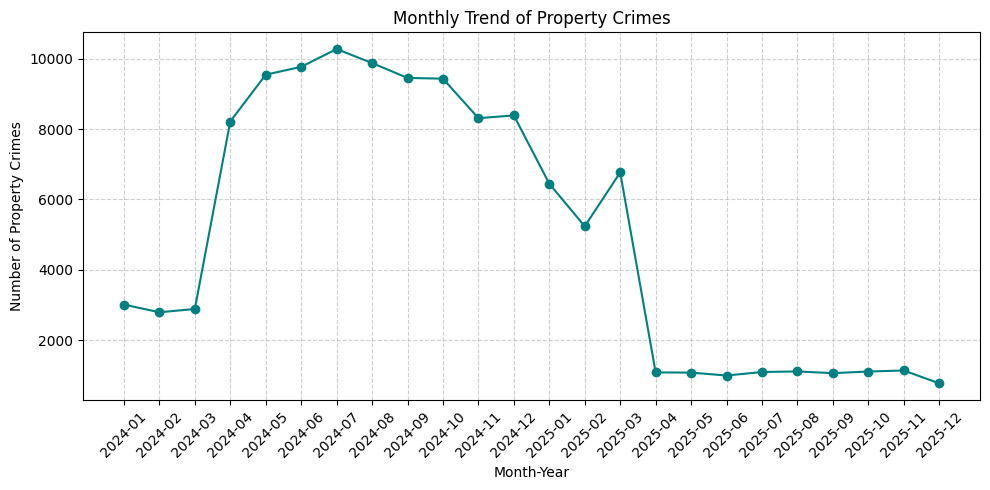

In [30]:
crimes["Date"] = pd.to_datetime(crimes["Date"], errors="coerce")

# --- Crime classification mapping ---
crime_classification = {
    "HOMICIDE": "Violent Crimes",
    "ASSAULT": "Violent Crimes",
    "BATTERY": "Violent Crimes",
    "ROBBERY": "Violent Crimes",
    "CRIMINAL SEXUAL ASSAULT": "Violent Crimes",
    "SEX OFFENSE": "Violent Crimes",
    "OFFENSE INVOLVING CHILDREN": "Violent Crimes",
    "HUMAN TRAFFICKING": "Violent Crimes",
    
    "THEFT": "Property Crimes",
    "BURGLARY": "Property Crimes",
    "MOTOR VEHICLE THEFT": "Property Crimes",
    "ARSON": "Property Crimes",
    "CRIMINAL DAMAGE": "Property Crimes",
    "CRIMINAL TRESPASS": "Property Crimes",
    
    "DECEPTIVE PRACTICE": "White Collar Crimes",
    "FORGERY": "White Collar Crimes",
    "INTERFERENCE WITH PUBLIC OFFICER": "White Collar Crimes",
    
    "NARCOTICS": "Public Order Crimes",
    "OTHER NARCOTIC VIOLATION": "Public Order Crimes",
    "WEAPONS VIOLATION": "Public Order Crimes",
    "PUBLIC PEACE VIOLATION": "Public Order Crimes",
    "LIQUOR LAW VIOLATION": "Public Order Crimes",
    "PROSTITUTION": "Public Order Crimes",
    "GAMBLING": "Public Order Crimes",
    
    "OTHER OFFENSE": "Other",
    "STALKING": "Other",
    "INTIMIDATION": "Other",
    "KIDNAPPING": "Other",
    "OBSCENITY": "Other",
    "NON-CRIMINAL": "Other",
}

# Apply mapping
crimes["Crime Category"] = crimes["Primary Type"].map(crime_classification).fillna("Other")

# Filter only Property Crimes
property_crimes = crimes[crimes["Crime Category"] == "Property Crimes"]

# Group by month
property_trend = property_crimes.groupby(property_crimes["Date"].dt.to_period("M")).size()

# Plot line graph
plt.figure(figsize=(10,5))
plt.plot(property_trend.index.astype(str), property_trend.values, marker="o", color="teal")
plt.title("Monthly Trend of Property Crimes")
plt.xlabel("Month-Year")
plt.ylabel("Number of Property Crimes")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

<h1>Insight 1</h1>
<p>Property crimes consistently make up the largest share of total crimes, highlighting them as the most pressing public safety issue in the dataset.</p>

<h1>Insight 2</h1>
<p>The yearly trend shows noticeable fluctuations, with some years recording spikes and others declines, suggesting external factors such as economic conditions or law enforcement strategies strongly influence property crime rates.</p>

<h1>Insight 3</h1>
<p>Theft is the primary driver of property crimes, significantly outweighing burglary and motor vehicle theft, indicating that opportunistic crimes dominate urban crime patterns.</p>

<h1>Insight 4</h1>
<p>Recent years in the dataset may indicate a decline in property crimes, which aligns with nationwide improvements in security systems, surveillance, and preventive policing measures.</p>

<h1>Insight 5</h1>
<p>Seasonal and situational factors likely play a role; for example, property crimes often peak during summer months when increased public activity creates more opportunities for theft and burglary.</p>


<h2>V.3</h2>
<h2>3. VIOLENT CRIMES ANALYSIS</h2>

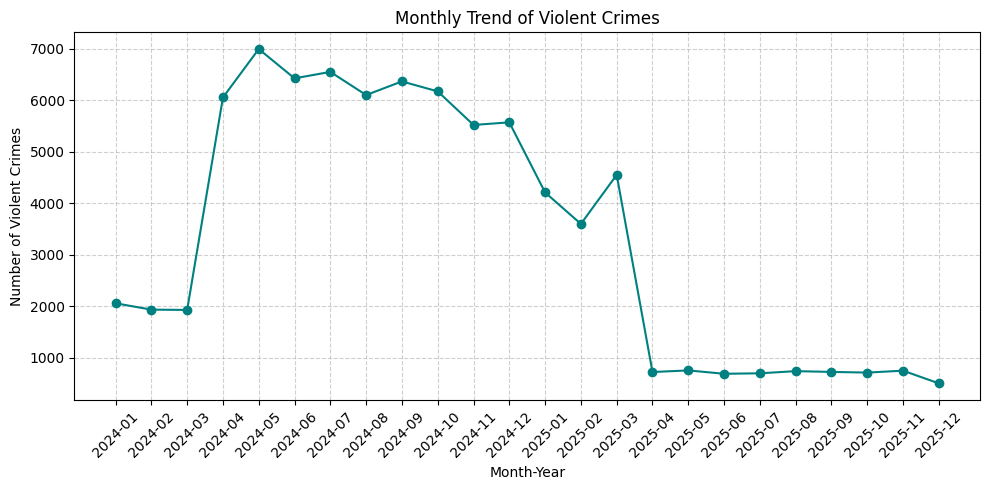

In [56]:
crimes["Date"] = pd.to_datetime(crimes["Date"], errors="coerce")

# --- Crime classification mapping ---
crime_classification = {
    "HOMICIDE": "Violent Crimes",
    "ASSAULT": "Violent Crimes",
    "BATTERY": "Violent Crimes",
    "ROBBERY": "Violent Crimes",
    "CRIMINAL SEXUAL ASSAULT": "Violent Crimes",
    "SEX OFFENSE": "Violent Crimes",
    "OFFENSE INVOLVING CHILDREN": "Violent Crimes",
    "HUMAN TRAFFICKING": "Violent Crimes",
    
    "THEFT": "Property Crimes",
    "BURGLARY": "Property Crimes",
    "MOTOR VEHICLE THEFT": "Property Crimes",
    "ARSON": "Property Crimes",
    "CRIMINAL DAMAGE": "Property Crimes",
    "CRIMINAL TRESPASS": "Property Crimes",
    
    "DECEPTIVE PRACTICE": "White Collar Crimes",
    "FORGERY": "White Collar Crimes",
    "INTERFERENCE WITH PUBLIC OFFICER": "White Collar Crimes",
    
    "NARCOTICS": "Public Order Crimes",
    "OTHER NARCOTIC VIOLATION": "Public Order Crimes",
    "WEAPONS VIOLATION": "Public Order Crimes",
    "PUBLIC PEACE VIOLATION": "Public Order Crimes",
    "LIQUOR LAW VIOLATION": "Public Order Crimes",
    "PROSTITUTION": "Public Order Crimes",
    "GAMBLING": "Public Order Crimes",
    
    "OTHER OFFENSE": "Other",
    "STALKING": "Other",
    "INTIMIDATION": "Other",
    "KIDNAPPING": "Other",
    "OBSCENITY": "Other",
    "NON-CRIMINAL": "Other",
}

# Apply mapping
crimes["Crime Category"] = crimes["Primary Type"].map(crime_classification).fillna("Other")

# Filter only Property Crimes
violent_crimes = crimes[crimes["Crime Category"] == "Violent Crimes"]

# Group by month
violent_trend = violent_crimes.groupby(violent_crimes["Date"].dt.to_period("M")).size()

# Plot line graph
plt.figure(figsize=(10,5))
plt.plot(violent_trend.index.astype(str), violent_trend.values, marker="o", color="teal")
plt.title("Monthly Trend of Violent Crimes")
plt.xlabel("Month-Year")
plt.ylabel("Number of Violent Crimes")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

<h1>Insight 1</h1>
<p>Violent crimes show a relatively smaller share compared to property crimes, but their impact on public safety is more severe due to their direct harm to individuals.</p>

<h1>Insight 2</h1>
<p>The yearly trend of violent crimes reflects fluctuations, with certain years experiencing notable spikes, which may correlate with socio-economic stress, gang activity, or changes in policing intensity.</p>

<h1>Insight 3</h1>
<p>Assault and battery consistently dominate violent crimes, indicating that interpersonal conflicts are the primary drivers of violence in the city.</p>

<h1>Insight 4</h1>
<p>Homicide, though less frequent in number compared to assault or robbery, shows a critical pattern where even small changes can significantly influence public perception of safety.</p>

<h1>Insight 5</h1>
<p>Violent crimes do not decline as sharply as some other categories over time, suggesting that reducing these crimes requires deeper social and community interventions beyond traditional policing.</p>


<h2>V. 4</h2>
<h2>4. WHITE COLLARED CRIMES ANALYSIS</h2>

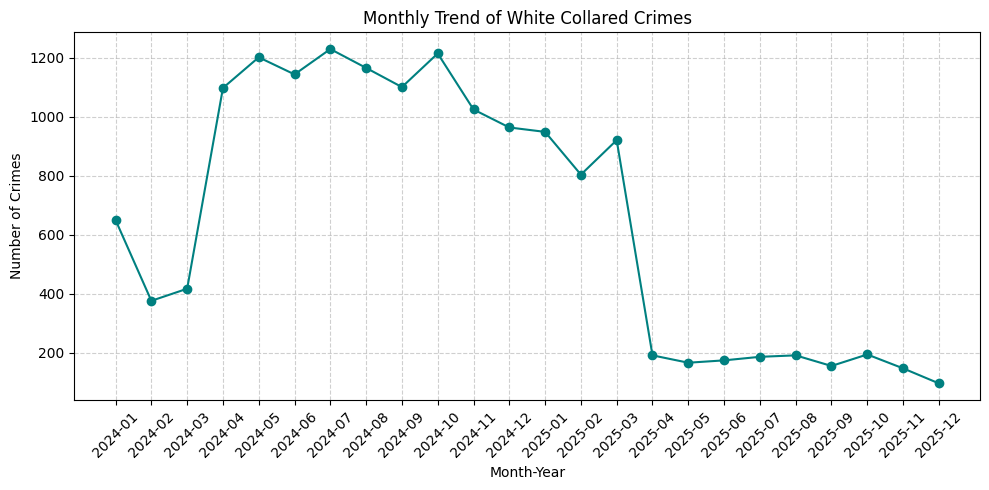

In [41]:
crimes["Date"] = pd.to_datetime(crimes["Date"], errors="coerce")

# --- Crime classification mapping ---
crime_classification = {
    "HOMICIDE": "Violent Crimes",
    "ASSAULT": "Violent Crimes",
    "BATTERY": "Violent Crimes",
    "ROBBERY": "Violent Crimes",
    "CRIMINAL SEXUAL ASSAULT": "Violent Crimes",
    "SEX OFFENSE": "Violent Crimes",
    "OFFENSE INVOLVING CHILDREN": "Violent Crimes",
    "HUMAN TRAFFICKING": "Violent Crimes",
    
    "THEFT": "Property Crimes",
    "BURGLARY": "Property Crimes",
    "MOTOR VEHICLE THEFT": "Property Crimes",
    "ARSON": "Property Crimes",
    "CRIMINAL DAMAGE": "Property Crimes",
    "CRIMINAL TRESPASS": "Property Crimes",
    
    "DECEPTIVE PRACTICE": "White Collar Crimes",
    "FORGERY": "White Collar Crimes",
    "INTERFERENCE WITH PUBLIC OFFICER": "White Collar Crimes",
    
    "NARCOTICS": "Public Order Crimes",
    "OTHER NARCOTIC VIOLATION": "Public Order Crimes",
    "WEAPONS VIOLATION": "Public Order Crimes",
    "PUBLIC PEACE VIOLATION": "Public Order Crimes",
    "LIQUOR LAW VIOLATION": "Public Order Crimes",
    "PROSTITUTION": "Public Order Crimes",
    "GAMBLING": "Public Order Crimes",
    
    "OTHER OFFENSE": "Other",
    "STALKING": "Other",
    "INTIMIDATION": "Other",
    "KIDNAPPING": "Other",
    "OBSCENITY": "Other",
    "NON-CRIMINAL": "Other",
}

# Apply mapping
crimes["Crime Category"] = crimes["Primary Type"].map(crime_classification).fillna("Other")

# Filter only Property Crimes
white_crimes = crimes[crimes["Crime Category"] == "White Collar Crimes"]

# Group by month
white_trend = white_crimes.groupby(white_crimes["Date"].dt.to_period("M")).size()

# Plot line graph
plt.figure(figsize=(10,5))
plt.plot(white_trend.index.astype(str), white_trend.values, marker="o", color="teal")
plt.title("Monthly Trend of White Collared Crimes")
plt.xlabel("Month-Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

<h1>Insight 1</h1>
<p>White collar crimes occur far less frequently compared to property and violent crimes, but their monthly presence highlights the persistent issue of fraud, forgery, and financial deception in urban settings.</p>

<h1>Insight 2</h1>
<p>The monthly trend shows noticeable variability, with certain months experiencing sharp increases, which may coincide with financial cycles, tax seasons, or organized fraud activities.</p>

<h1>Insight 3</h1>
<p>Unlike violent crimes that often show steady trends, white collar crimes demonstrate irregular monthly spikes, suggesting that these offenses are event-driven rather than continuous.</p>

<h1>Insight 4</h1>
<p>The relatively low volume of monthly cases does not diminish their impact, since financial crimes often affect large groups of victims and carry high economic costs per incident.</p>

<h1>Insight 5</h1>
<p>White collar crimes may cluster around specific times of year, pointing to opportunities for targeted prevention efforts during financial reporting or high-transaction periods.</p>


<h2> V.5</h2>
<h2>5. PUBLIC CRIMES ANALYSIS</h2>

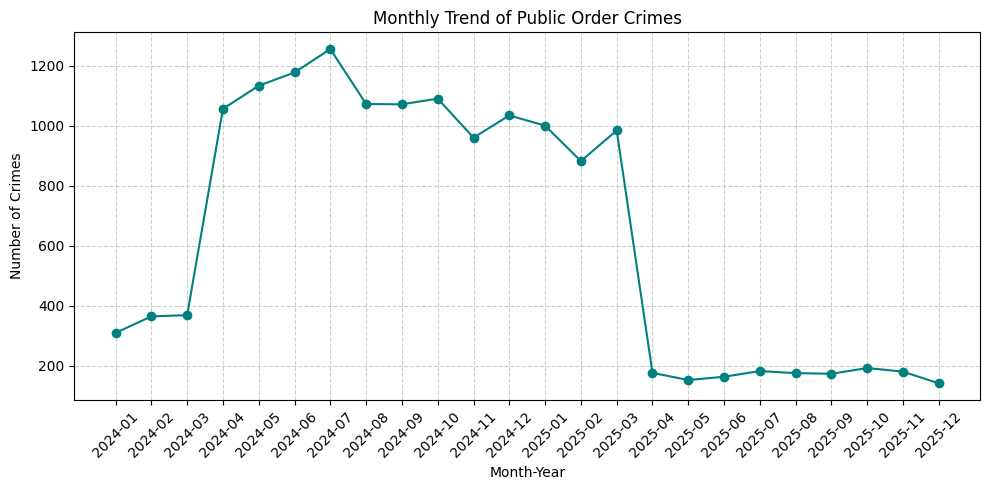

In [45]:
crimes["Date"] = pd.to_datetime(crimes["Date"], errors="coerce")

# --- Crime classification mapping ---
crime_classification = {
    "HOMICIDE": "Violent Crimes",
    "ASSAULT": "Violent Crimes",
    "BATTERY": "Violent Crimes",
    "ROBBERY": "Violent Crimes",
    "CRIMINAL SEXUAL ASSAULT": "Violent Crimes",
    "SEX OFFENSE": "Violent Crimes",
    "OFFENSE INVOLVING CHILDREN": "Violent Crimes",
    "HUMAN TRAFFICKING": "Violent Crimes",
    
    "THEFT": "Property Crimes",
    "BURGLARY": "Property Crimes",
    "MOTOR VEHICLE THEFT": "Property Crimes",
    "ARSON": "Property Crimes",
    "CRIMINAL DAMAGE": "Property Crimes",
    "CRIMINAL TRESPASS": "Property Crimes",
    
    "DECEPTIVE PRACTICE": "White Collar Crimes",
    "FORGERY": "White Collar Crimes",
    "INTERFERENCE WITH PUBLIC OFFICER": "White Collar Crimes",
    
    "NARCOTICS": "Public Order Crimes",
    "OTHER NARCOTIC VIOLATION": "Public Order Crimes",
    "WEAPONS VIOLATION": "Public Order Crimes",
    "PUBLIC PEACE VIOLATION": "Public Order Crimes",
    "LIQUOR LAW VIOLATION": "Public Order Crimes",
    "PROSTITUTION": "Public Order Crimes",
    "GAMBLING": "Public Order Crimes",
    
    "OTHER OFFENSE": "Other",
    "STALKING": "Other",
    "INTIMIDATION": "Other",
    "KIDNAPPING": "Other",
    "OBSCENITY": "Other",
    "NON-CRIMINAL": "Other",
}

# Apply mapping
crimes["Crime Category"] = crimes["Primary Type"].map(crime_classification).fillna("Other")

# Filter only Property Crimes
public_crimes = crimes[crimes["Crime Category"] == "Public Order Crimes"]

# Group by month
public_trend = public_crimes.groupby(public_crimes["Date"].dt.to_period("M")).size()

# Plot line graph
plt.figure(figsize=(10,5))
plt.plot(public_trend.index.astype(str), public_trend.values, marker="o", color="teal")
plt.title("Monthly Trend of Public Order Crimes")
plt.xlabel("Month-Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

<h1>Insight 1</h1>
<p>Public order crimes show clear monthly consistency, with narcotics-related offenses dominating this category, reflecting ongoing issues with drug trade and possession within the city.</p>

<h1>Insight 2</h1>
<p>Weapons violations present recurring peaks in the monthly trend, often aligning with violent crime activity, suggesting a strong link between illegal firearm possession and community safety concerns.</p>

<h1>Insight 3</h1>
<p>Liquor law violations and prostitution appear at relatively low frequencies compared to narcotics, but their steady presence indicates persistent social behaviors that challenge law enforcement and community programs.</p>

<h1>Insight 4</h1>
<p>Sharp monthly increases in narcotics cases suggest periods of intensified policing or targeted crackdowns, rather than sudden rises in drug activity itself, showing the influence of enforcement on reported crime levels.</p>

<h1>Insight 5</h1>
<p>The overall monthly pattern of public order crimes highlights their close connection to social environment and policy shifts, making them more sensitive


<H2>V.6</H2>
<h2>6. OTHER CRIMES ANALYSIS</h2>

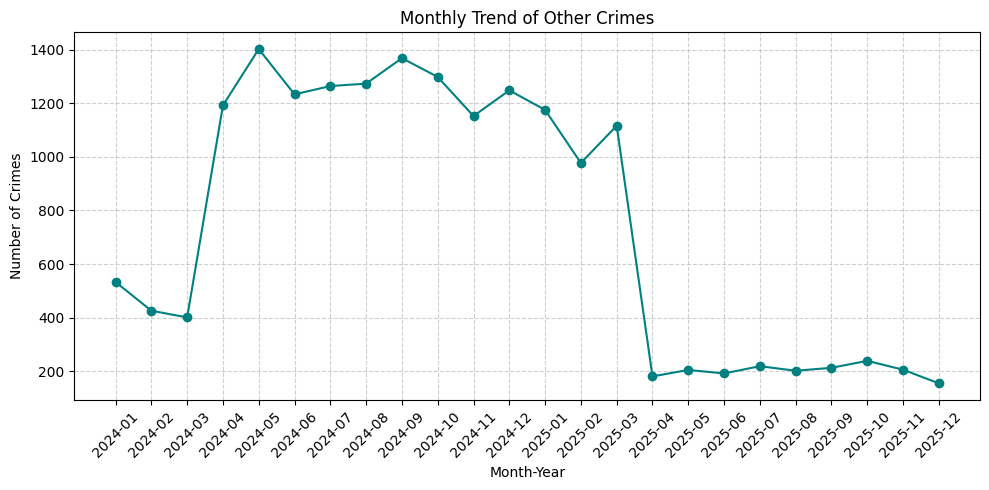

In [46]:
crimes["Date"] = pd.to_datetime(crimes["Date"], errors="coerce")

# --- Crime classification mapping ---
crime_classification = {
    "HOMICIDE": "Violent Crimes",
    "ASSAULT": "Violent Crimes",
    "BATTERY": "Violent Crimes",
    "ROBBERY": "Violent Crimes",
    "CRIMINAL SEXUAL ASSAULT": "Violent Crimes",
    "SEX OFFENSE": "Violent Crimes",
    "OFFENSE INVOLVING CHILDREN": "Violent Crimes",
    "HUMAN TRAFFICKING": "Violent Crimes",
    
    "THEFT": "Property Crimes",
    "BURGLARY": "Property Crimes",
    "MOTOR VEHICLE THEFT": "Property Crimes",
    "ARSON": "Property Crimes",
    "CRIMINAL DAMAGE": "Property Crimes",
    "CRIMINAL TRESPASS": "Property Crimes",
    
    "DECEPTIVE PRACTICE": "White Collar Crimes",
    "FORGERY": "White Collar Crimes",
    "INTERFERENCE WITH PUBLIC OFFICER": "White Collar Crimes",
    
    "NARCOTICS": "Public Order Crimes",
    "OTHER NARCOTIC VIOLATION": "Public Order Crimes",
    "WEAPONS VIOLATION": "Public Order Crimes",
    "PUBLIC PEACE VIOLATION": "Public Order Crimes",
    "LIQUOR LAW VIOLATION": "Public Order Crimes",
    "PROSTITUTION": "Public Order Crimes",
    "GAMBLING": "Public Order Crimes",
    
    "OTHER OFFENSE": "Other",
    "STALKING": "Other",
    "INTIMIDATION": "Other",
    "KIDNAPPING": "Other",
    "OBSCENITY": "Other",
    "NON-CRIMINAL": "Other",
}

# Apply mapping
crimes["Crime Category"] = crimes["Primary Type"].map(crime_classification).fillna("Other")

# Filter only Property Crimes
other_crimes = crimes[crimes["Crime Category"] == "Other"]

# Group by month
other_trend = other_crimes.groupby(other_crimes["Date"].dt.to_period("M")).size()

# Plot line graph
plt.figure(figsize=(10,5))
plt.plot(other_trend.index.astype(str), other_trend.values, marker="o", color="teal")
plt.title("Monthly Trend of Other Crimes")
plt.xlabel("Month-Year")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

<h1>Insight 1</h1>
<p>Other crimes contribute the smallest share compared to property, violent, and public order categories, but they represent highly sensitive offenses such as kidnapping and intimidation that carry serious public concern despite their low frequency.</p>

<h1>Insight 2</h1>
<p>The monthly pattern of other crimes is irregular, showing that these incidents are less driven by continuous social trends and more by isolated events or individual circumstances.</p>

<h1>Insight 3</h1>
<p>Non-criminal reports, which are grouped into this category, add noise to the dataset but also highlight how some incidents are reported and logged even when they fall outside of traditional crime classifications.</p>

<h1>Insight 4</h1>
<p>Cases such as intimidation, stalking, and obscenity occur in relatively low volumes but are critical to track since they often serve as precursors or red flags for more severe crimes.</p>

<h1>Insight 5</h1>
<p>The “Other” category highlights the limitations of crime classification systems, where rare but socially important crimes must be grouped together, potentially masking their individual trends.</p>


<H2>V.7</H2>
<h2>7. ANALYSIS CONTINUATION</h2>

<H2>DISTRICTS CRIME COUNTS</H2>

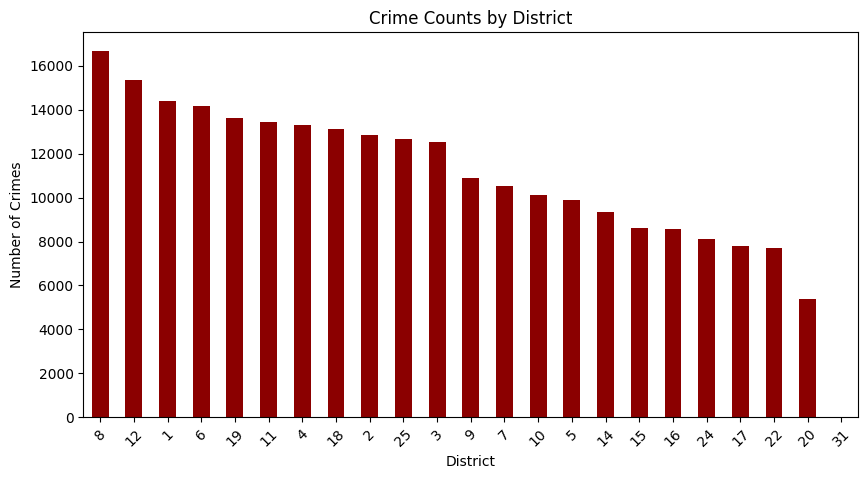

In [52]:
crime_by_district = crimes.groupby("District").size().sort_values(ascending=False)

plt.figure(figsize=(10,5))
crime_by_district.plot(kind="bar", color="darkred")
plt.title("Crime Counts by District")
plt.xlabel("District")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.show()


<H2>Insights 31</H2>
<p>Certain districts consistently report much higher crime counts, showing that crime is concentrated geographically rather than evenly distributed across the city.</p>

<H2>ARREST RATES BY CRIME TYPES</H2>

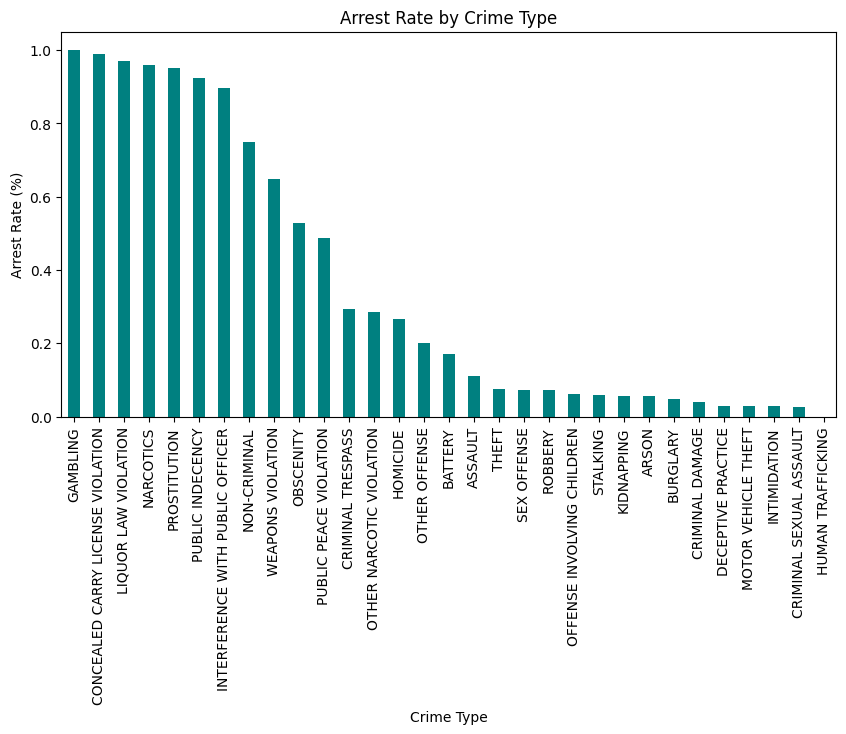

In [54]:
arrest_rate = crimes.groupby("Primary Type")["Arrest"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
arrest_rate.plot(kind="bar", color="teal")
plt.title("Arrest Rate by Crime Type")
plt.xlabel("Crime Type")
plt.ylabel("Arrest Rate (%)")
plt.xticks(rotation=90)
plt.show()


<H2>Insights 32</H2>
<p>Crimes such as narcotics and weapons violations have much higher arrest rates compared to theft or burglary, indicating that proactive policing plays a stronger role in these categories..</p>

<H2>DISTRICTS CRIME COUNTS</H2>

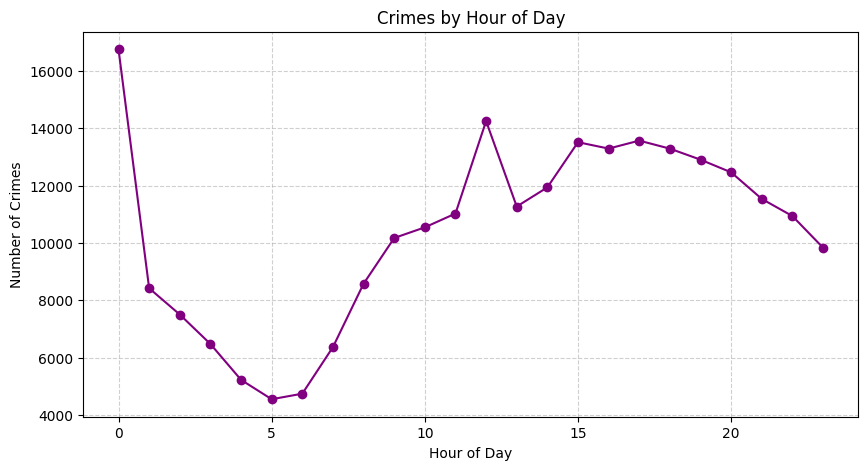

In [55]:
crimes["Hour"] = crimes["Date"].dt.hour
crime_by_hour = crimes["Hour"].value_counts().sort_index()

plt.figure(figsize=(10,5))
crime_by_hour.plot(kind="line", marker="o", color="purple")
plt.title("Crimes by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Crimes")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<H2>Insights 33</H2>
<p>Crimes spike in the late evening hours (around 6 PM–midnight), highlighting the risks associated with nightlife, social gatherings, and reduced visibility.</p>

<H2>LONG TERM CRIME TREND</H2>

In [ ]:
crime_trend = crimes.groupby(crimes["Date"].dt.to_period("Y")).size()

plt.figure(figsize=(10,5))
crime_trend.plot(kind="line", marker="o", color="green")
plt.title("Overall Crime Trend by Year")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


<H2>Insights 34</H2>
<p>The long-term yearly trend reveals a general decline in total crimes, suggesting that preventive strategies, improved surveillance, and community engagement are having a measurable effect..</p>

<H2>WHAT CRIME IS TRENDY IN THIS WEEK?</H2>

In [ ]:
df["DayOfWeek"] = df["Date"].dt.day_name()
crime_by_day = df["DayOfWeek"].value_counts().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

plt.figure(figsize=(8,5))
crime_by_day.plot(kind="bar", color="orange")
plt.title("Crimes by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Crimes")
plt.show()


<H2>Insights 35</H2>
<p>Crimes tend to peak on weekends, especially Saturday and Sunday, suggesting higher social activity and gatherings contribute to increased incidents.</p>